## Goal: to explore data to guide future analysis
##### Intended Result: come away with some ideas to dive deeper into using more advanced methods



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_csv('clean_crime_data.csv')

lets check out the top 20 most frequently reported types of crimes

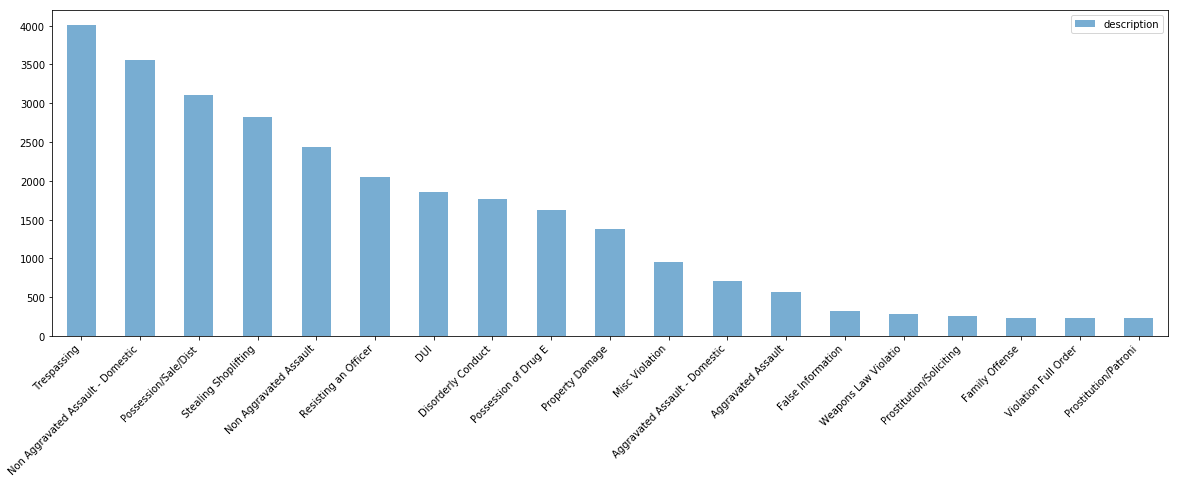

In [48]:
top_crimes = pd.DataFrame(df.description.value_counts()).iloc[0:19]

def simpleBarPlot(df):
    df.plot(kind = 'bar', alpha = .6, figsize = [20,6])
    plt.xticks(np.arange(len(df)), rotation=45, ha='right')

simpleBarPlot(top_crimes)

what about the top 20 crimes that people get arrested for most?

In [50]:
df.head()

,crime_id,from_date,description,zip_code,charge_id,dvflag,firearm_used_flag,arr_flag,vic_flag,sus_flag,...,age_18_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_plus,total_vic,male_vic,male_vic.1
0,100034831_919,10/18/2016,Stolen Property,64130,919,0,0,1,0,0,...,0,1,0,0,0,0,0,0.0,0.0,0.0
1,130056370_897,7/3/2016,Possession/Sale/Dist,64133,897,0,0,1,0,0,...,0,0,0,0,0,0,1,0.0,0.0,0.0
2,140071459_919,3/26/2016,Stolen Property,64130,919,0,0,1,0,0,...,0,1,0,0,0,0,0,1.0,1.0,0.0
3,150064182_897,08/26/2018,Possession/Sale/Dist,64157,897,0,0,1,0,0,...,0,0,0,0,0,1,0,0.0,0.0,0.0
4,150082191_897,10/18/2017,Possession/Sale/Dist,64105,897,0,0,1,0,0,...,1,0,0,0,0,0,0,0.0,0.0,0.0


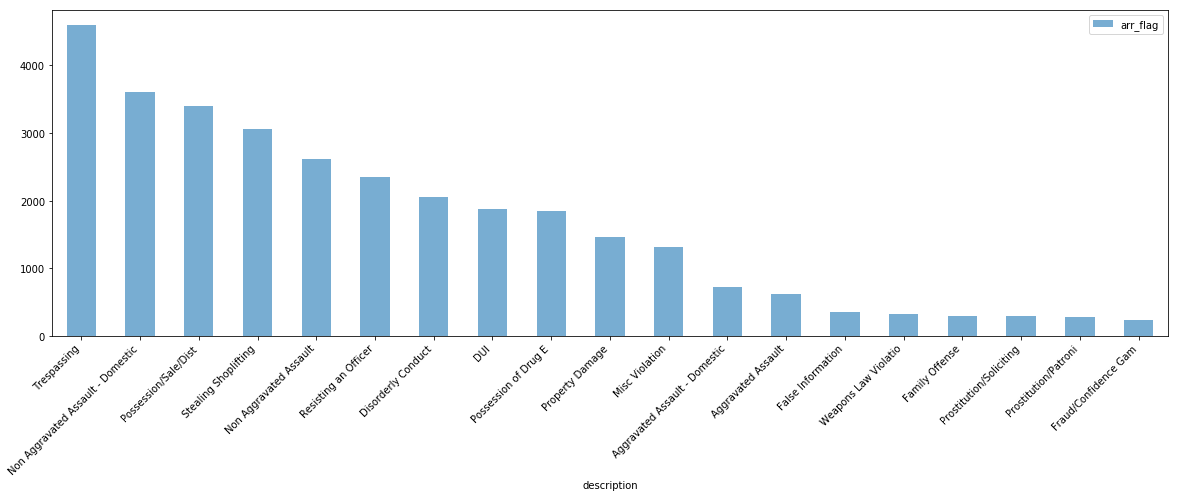

In [58]:
simpleBarPlot(df[['description','arr_flag']].groupby('description').sum().sort_values('arr_flag',
                                                                                      ascending = False).iloc[0:19])

What kinds of crimes involve the most amounts of guns?

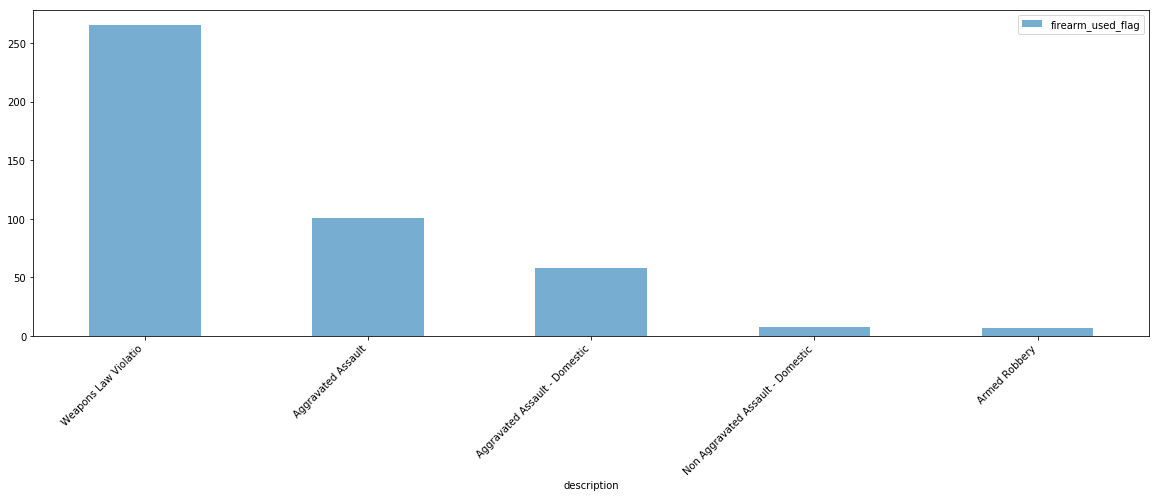

In [61]:
simpleBarPlot(df[['description','firearm_used_flag']].groupby('description').sum().sort_values('firearm_used_flag',
                                                                                      ascending = False).iloc[0:5])